In [1]:
import pandas as a
url = 'https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv'
titanic = a.read_csv(url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
null_columns = titanic.columns[titanic.isnull().any()]
null_columns

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [6]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


titanic['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-6-86c94901e9b7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
<ipython-input-6-86c94901e9b7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [7]:
titanic['Age']

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [8]:
titanic['Cabin']

,Cabin
0,Unknown
1,C85
2,Unknown
3,C123
4,Unknown
...,...
886,Unknown
887,B42
888,Unknown
889,C148


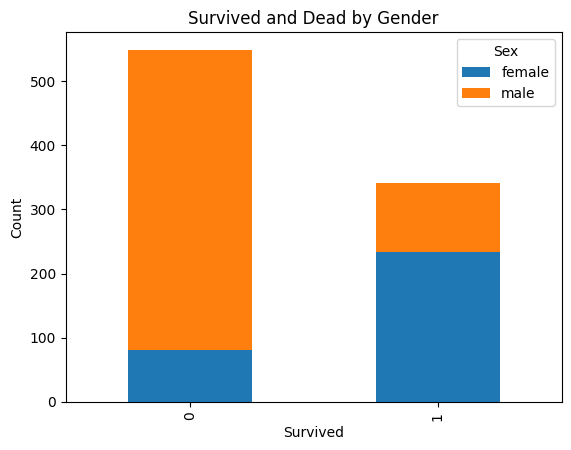

In [9]:
import matplotlib.pyplot as plt

# Plotting Survived and Dead with Gender
survived_dead_gender = titanic.groupby(['Survived', 'Sex']).size().unstack()

survived_dead_gender.plot(kind='bar', stacked=True)
plt.title('Survived and Dead by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

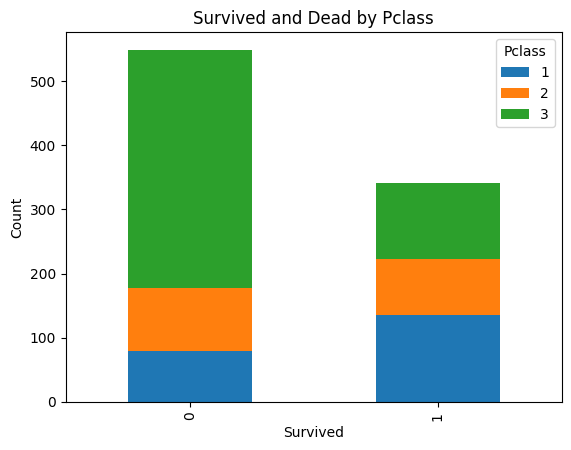

In [10]:
# Plotting Survived and Dead with Pclass
survived_dead_pclass = titanic.groupby(['Survived', 'Pclass']).size().unstack()

survived_dead_pclass.plot(kind='bar', stacked=True)
plt.title('Survived and Dead by Pclass')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [11]:
def age_class(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

titanic['AgeClass'] = titanic['Age'].apply(age_class)
titanic['AgeClass']


,AgeClass
0,1
1,3
2,1
3,2
4,2
...,...
886,2
887,1
888,2
889,1


In [12]:
titanic.drop(columns=['Age'], inplace=True)

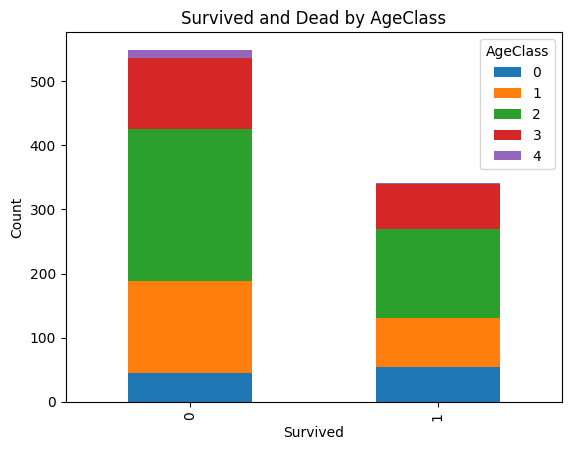

In [13]:
# Plotting Survived and Dead with AgeClass
survived_dead_ageclass = titanic.groupby(['Survived', 'AgeClass']).size().unstack()

survived_dead_ageclass.plot(kind='bar', stacked=True)
plt.title('Survived and Dead by AgeClass')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

<ipython-input-16-f3e8d99376ff>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


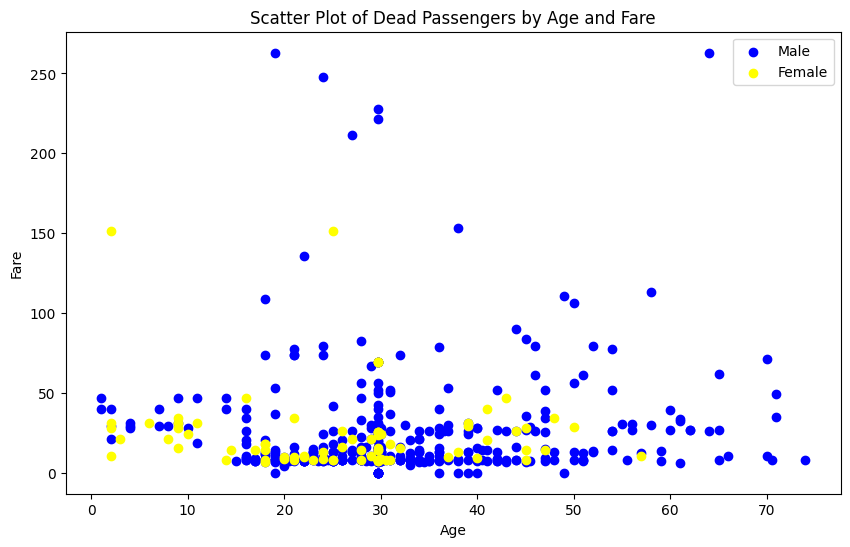

In [16]:


# Fill the null values in 'Age' with the mean of other values
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

# Filter the dataset to get only dead passengers
dead_passengers = titanic[titanic['Survived'] == 0]

# Scatter plot
plt.figure(figsize=(10, 6))

# Plot male passengers
male_passengers = dead_passengers[dead_passengers['Sex'] == 'male']
plt.scatter(male_passengers['Age'], male_passengers['Fare'], color='blue', label='Male')

# Plot female passengers
female_passengers = dead_passengers[dead_passengers['Sex'] == 'female']
plt.scatter(female_passengers['Age'], female_passengers['Fare'], color='yellow', label='Female')

# Add title and labels
plt.title('Scatter Plot of Dead Passengers by Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()

# Display the plot
plt.show()
